In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud , STOPWORDS
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (1).csv


In [3]:
from google.colab import files
uploaded1 = files.upload()

Saving spam_additional.csv to spam_additional (1).csv


In [4]:
import io
final = pd.read_csv(io.BytesIO(uploaded['spam.csv']),usecols=['v1', 'v2'],  encoding = 'latin-1')
final.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
import io
final1 = pd.read_csv(io.BytesIO(uploaded1['spam_additional.csv']),usecols=['Text', 'v3'],  encoding = 'latin-1')
final1.head()

,Text,v3
0,"Dear Customer,\nThis is a confirmation that th...",spam
1,"Hello ADEYINKA, present your CV for interview ...",spam
2,Edgerit Limited invites you for an interview f...,spam
3,You are invited for an aptitude test with UBA ...,spam
4,"Mag consult ltd, shortlisted (you/candidate no...",spam


In [6]:
#Rename the colunm 
final=final.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = False)
final1=final1.rename(columns = {'Text': 'text', 'v3': 'target'}, inplace = False)

In [7]:
final=final.append(final1,ignore_index=True)

In [8]:
final.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Number of columns and rows
final.shape

(6012, 2)

In [10]:
#number of repeated words
final.text.value_counts()

Sorry, I'll call later                                                                                                                      30
I cant pick the phone right now. Pls send a message                                                                                         12
Ok...                                                                                                                                       10
Ok.                                                                                                                                          4
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..     4
                                                                                                                                            ..
&lt;#&gt;  great loxahatchee xmas tree burning update: you can totally see stars here                                                        1

In [11]:
#create a dataframe with spam and ham
condition1 = final['target'] == 'ham'
condition2 = final['target'] == 'spam'
spam = final[condition2]
ham = final[condition1]

In [12]:
#create function called combine which help in extracting all the text of particular column and the combining them together to get one string
def combine(array):
    whole_text = ' '
    for sentence in array:
        whole_text = whole_text+sentence
    return whole_text

In [13]:
#pandas->numpy array
spam_array = spam.iloc[:, 1].values
spam_text = combine(spam_array)

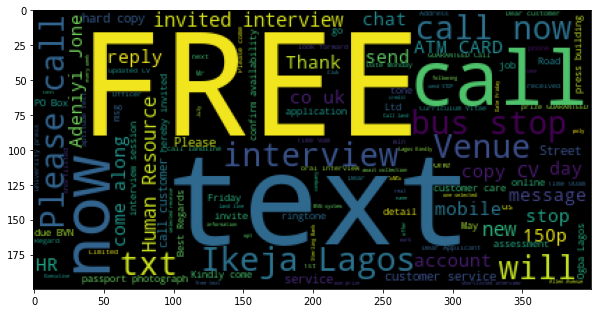

In [14]:
#Generating Worldcloud by removing stopwords
spam_cloud = WordCloud(background_color = 'black', stopwords = STOPWORDS).generate(spam_text)
plt.figure(figsize=(10,7), frameon=True)
plt.imshow(spam_cloud)

From the visualization on spam by wordcloud,we can see the most usually word for spam

In [15]:
#pandas->numpy array
ham_array = ham.iloc[:, 1].values
ham_text = combine(ham_array)

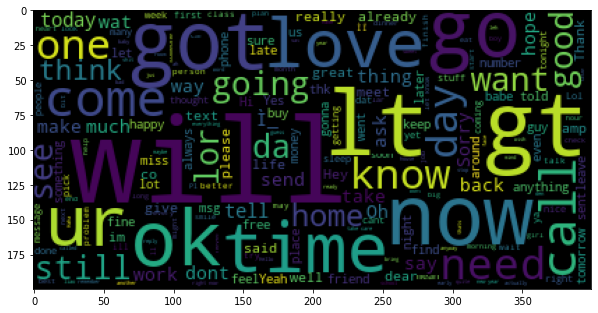

In [16]:
#Generating Worldcloud by removing stopwords
ham_cloud = WordCloud(background_color = 'black', stopwords = STOPWORDS).generate(ham_text)
plt.figure(figsize=(10,7), frameon=True)
plt.imshow(ham_cloud)

The visuallization on ham also bring out some most used words

In [17]:
#Replace the target colunms with binary number
final.replace({'ham':1,'spam':0},inplace=True)

In [18]:
final.head()

,target,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
#Converting textual data to arrays
word2vec = CountVectorizer()
word2vec.fit(final.text.ravel())
vector_words = word2vec.transform(final.text.ravel())
words_array = vector_words.toarray()

In [20]:
words_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])


### Modelling

We will be looking at the following Algorithms:
 * GaussianNB
 * GradientBoostingClassifier
 * RandomForestClassifier
 * MultinomialNB
 * Support vector Machine


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(words_array,final['target'],test_size=0.20,random_state=42)

In [22]:
# importing the required algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
# import the evaluation metrics
from sklearn import metrics

# create a dictionary of different algorithms 
models = {'MultinomialNB':MultinomialNB(),
          'GaussianNB':GaussianNB(),
        'GradientBoostingClassifier':GradientBoostingClassifier(random_state=100, n_estimators=150,min_samples_split=100, max_depth=6),
        'RandomForestClassifier':RandomForestClassifier(n_estimators=50),
        'Support vector machine':SVC(kernel='rbf')}

In [23]:
# helper funtion to compute the score, accuracy and precision, time on the training and testing set

def pipeline(models, X_train, X_test, y_train, y_test):
    """
    This function iteratively goes through all the models defined in the dictionary and 
    computes the Train_score, Test_score, Acurancy and precision.
    
    Parameters: model, training set(X_train), test_set(X_test), train_labels(y_train), and test_labels(y_test).
    
    Returns: This funtion returns a dataFrame containing calculations of each models and also plots bar
            chart showing how each models performs.
    """
    
    # store properties of each model
    prop = []
    
    # loop through the dictionary of models
    for reg_name, regressor in models.items():
        # empty dict for storing properties of each models
        reg_dict = {}
        # store the name of each model
        reg_dict['Name'] = reg_name
        # fit the regressor model
        regressor.fit(X_train, y_train)
        # compute the Train_score
        reg_dict['Train_score'] = regressor.score(X_train, y_train)
        # compute the test scores
        reg_dict['Test_score'] = regressor.score(X_test, y_test)
        # compute the acuracy
        reg_dict['Accuracy'] =metrics.accuracy_score(y_test, regressor.predict(X_test))
        # compute the precision
        reg_dict['Precision'] =metrics.precision_score(y_test, regressor.predict(X_test))
        
        
        
        
        
        # append the properties of a single regressor to the prop list
        prop.append(reg_dict)
     
    # create a dataframe with a list of all the model properties
    summary_df = pd.DataFrame(prop)
    
    # plot a bar chart to visualize the performance of each model
    summary_df.plot(x='Name', y=['Train_score', 'Test_score','Accuracy','Precision'], kind='bar', figsize=(15,10),
               title='Performance scores of different models')
    return summary_df

,Name,Train_score,Test_score,Accuracy,Precision
0,MultinomialNB,0.991266,0.975894,0.975894,0.981073
1,GaussianNB,0.902059,0.840399,0.840399,0.988312
2,GradientBoostingClassifier,0.999584,0.970075,0.970075,0.967078
3,RandomForestClassifier,1.000000,0.975062,0.975062,0.969199
4,Support vector machine,0.995633,0.971737,0.971737,0.979958


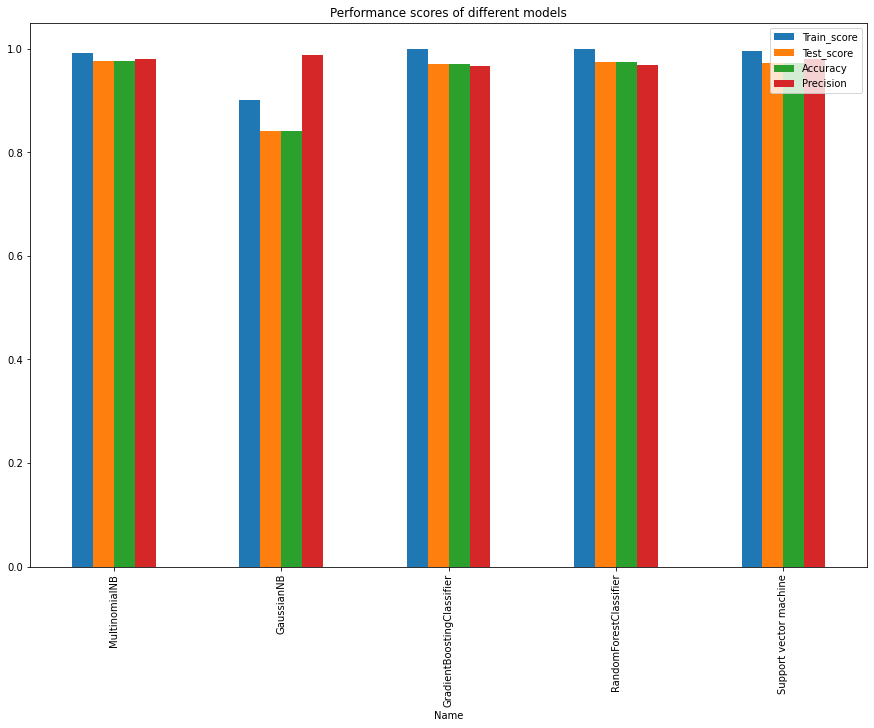

In [24]:
# execute the function
pipeline(models, X_train, X_test, y_train, y_test)

**Observaions**

From the plot above we conclude as follows

  * Best performing model are Support vector machine and MultinomialNB which have the highest scores on evaluation metrics  and MultinomialNB, the fourth highest scores in training and highest score testing set with support vector machine.

   * GaussianNB over Linear regression was the least performing model.

   * some algorithms have very high variance and low bias.

   * The MultinomialNB and Support vector machine seem to have a good balance between variance and bias.

**Hyperparameter Tunning**

Lets tuned some hyperparameters to see if we can obtain a low bias and low varince of the Support vector machine and multinomialNB. This would help our model not to overfit or underfit.

In [25]:

from sklearn.model_selection import RandomizedSearchCV
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
param_grid = {'alpha': alphas}
NB_cls= MultinomialNB()
grid=RandomizedSearchCV(estimator=NB_cls, param_distributions=param_grid, n_iter=10)

In [26]:
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                           fit_prior=True),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7, 0.8, 0.9, 1.0]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [27]:
# check for the best param fot the RandomForestClassifier

print(f'best param of the RandomForestClassifier is: {grid.best_params_}')

best param of the RandomForestClassifier is: {'alpha': 0.9}


In [28]:
# Best possible estimator for # Best possible estimator for RandomForestClassifier


best_model = grid.best_estimator_
print('print R2_score on training_set with tuned parameters:',best_model.score(X_train, y_train))
print('print R2_score on testing_set with tuned parameters:', round(best_model.score(X_test, y_test), 3))
print('print Accuracy_score on testing_set with tuned parameters:' ,round(metrics.accuracy_score(y_test, best_model.predict(X_test)), 3))
print('print Precision_score on testing_set with tuned parameters:', round(metrics.precision_score(y_test, best_model.predict(X_test))))

print R2_score on training_set with tuned parameters: 0.991474318985236
print R2_score on testing_set with tuned parameters: 0.977
print Accuracy_score on testing_set with tuned parameters: 0.977
print Precision_score on testing_set with tuned parameters: 1.0


In [29]:
# predict the test data
preds=grid.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[242,  17],
       [ 11, 933]])

In [31]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
    plt.ylabel('True target')
    plt.xlabel('Predicted terget')

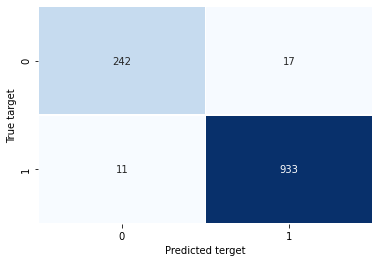

In [32]:
import seaborn as sns
plot_confusion_matrix(y_test, preds)

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................................ C=0.1, total= 2.4min
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min remaining:    0.0s


[CV] ............................................ C=0.1, total= 2.3min
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total= 2.3min
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total= 2.3min
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total= 2.3min
[CV] C=1 .............................................................
[CV] .............................................. C=1, total= 1.9min
[CV] C=1 .............................................................
[CV] .............................................. C=1, total= 1.9min
[CV] C=1 .............................................................
[CV] .............................................. C=1, total= 1.9min
[CV] C=1 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 21.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [48]:
#Find the optimal parameters
print(grid.best_estimator_)
print('print R2_score on training_set with tuned parameters:',grid.best_estimator_.score(X_train, y_train))
print('print R2_score on testing_set with tuned parameters:', round(grid.best_estimator_.score(X_test, y_test), 3))
print('print Accuracy_score on testing_set with tuned parameters:' ,round(metrics.accuracy_score(y_test, grid.best_estimator_.predict(X_test)), 3))
print('print Precision_score on testing_set with tuned parameters:', round(metrics.precision_score(y_test, grid.best_estimator_.predict(X_test))))

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
print R2_score on training_set with tuned parameters: 0.9956331877729258
print R2_score on testing_set with tuned parameters: 0.972
print Accuracy_score on testing_set with tuned parameters: 0.972
print Precision_score on testing_set with tuned parameters: 1.0


In [51]:
#Take this grid model to create some predictions using the test set and then create classification reports and confusion matrices
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))#Output

[[240  19]
 [ 15 929]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       259
           1       0.98      0.98      0.98       944

    accuracy                           0.97      1203
   macro avg       0.96      0.96      0.96      1203
weighted avg       0.97      0.97      0.97      1203

